# OLA Data Analysis

## Description-

### OLA Analysis  involves studing data related to OLA rides such as ride time,rating,category,and rush hour timing.The analysis can be used to understand user behaviour,driver patter and  rush week days and hours

# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing data

In [2]:
# importing the data into notebook 
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\ola dataset.csv",encoding="latin1")
df.head()

,booking id,booking_date_time,gender,month,day_of_week,time_of_day,distance_travelled,time_taken,reason,toll,category,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,ratings
0,1890061540,5/29/18 22:04,Male,May,Tue,10:04:00 PM,17,58.0,Office to/from Home,0,Mini,57.73,230.91,21.94,311.00,3
1,1542148932,2/22/18 22:12,Female,February,Thu,10:12:00 PM,18,43.0,Late Night Ride,0,Mini,52.04,208.16,19.76,279.96,5
2,1672692603,4/4/18 21:11,Female,April,Wed,09:11:00 PM,2,5.0,Office to/from Home,0,Prime,19.70,78.81,7.49,106.00,5
3,1925600201,6/7/18 22:23,Female,June,Thu,10:23:00 PM,15,49.0,Office to/from Home,35,Micro,51.24,239.96,21.22,312.00,5
4,1530845664,2/19/18 11:31,Male,February,Mon,11:31:00 AM,46,0.0,Office Event,0,Prime Rentals,195.92,783.68,74.45,1054.05,4


# Checking and dropping the null values in the dataset

In [3]:
df.isnull().sum().any() # true means null values in the data
                        # we have to drop null values from the data

True

In [4]:
# checking the null values in which column in the data
df.isnull().sum() # reason column have 93 null values

booking id               0
booking_date_time        0
gender                   0
month                    0
day_of_week              0
time_of_day              0
distance_travelled       0
time_taken               0
reason                  93
toll                     0
category                 0
commission_base_cost     0
driver_base_cost         0
total_tax                0
total_trip_cost          0
ratings                  0
dtype: int64

In [5]:
# drop the null values
df.dropna(inplace=True)

In [6]:
# check the null values is drop or not
df.isnull().sum() #null values is drop know

booking id              0
booking_date_time       0
gender                  0
month                   0
day_of_week             0
time_of_day             0
distance_travelled      0
time_taken              0
reason                  0
toll                    0
category                0
commission_base_cost    0
driver_base_cost        0
total_tax               0
total_trip_cost         0
ratings                 0
dtype: int64

# checking the duplicates in the dataset

In [7]:
# checking the duplicates in the dataset
df.duplicated().sum() #  0 means their is no duplicates in the dataset

0

# Data Exploration

### Shape of the Dataset

In [8]:
print("Rows",df.shape[0])
print("Columns",df.shape[1])

Rows 4857
Columns 16


### Columns names

In [9]:
df.columns

Index(['booking id', 'booking_date_time', 'gender', 'month', 'day_of_week',
       'time_of_day', 'distance_travelled', 'time_taken', 'reason', 'toll',
       'category', 'commission_base_cost', 'driver_base_cost', 'total_tax',
       'total_trip_cost', 'ratings'],
      dtype='object')

### All informations about dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4857 entries, 0 to 4949
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   booking id            4857 non-null   object 
 1   booking_date_time     4857 non-null   object 
 2   gender                4857 non-null   object 
 3   month                 4857 non-null   object 
 4   day_of_week           4857 non-null   object 
 5   time_of_day           4857 non-null   object 
 6   distance_travelled    4857 non-null   int64  
 7   time_taken            4857 non-null   float64
 8   reason                4857 non-null   object 
 9   toll                  4857 non-null   int64  
 10  category              4857 non-null   object 
 11  commission_base_cost  4857 non-null   float64
 12  driver_base_cost      4857 non-null   float64
 13  total_tax             4857 non-null   float64
 14  total_trip_cost       4857 non-null   float64
 15  ratings               4857

### Statistical infromations about all numerical columns

In [11]:
df.describe()

,distance_travelled,time_taken,toll,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,ratings
count,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000
mean,11.699609,35.084622,5.386041,47.533582,195.846020,18.353613,261.670616,3.736257
std,10.351948,25.624459,15.872167,37.137418,155.194386,14.396698,206.235025,1.173670
min,0.000000,0.000000,0.000000,0.000000,26.020000,2.470000,34.000000,1.000000
25%,4.000000,7.000000,0.000000,22.490000,90.700000,8.590000,122.000000,3.000000
50%,8.000000,35.000000,0.000000,37.630000,151.270000,14.360000,203.000000,4.000000
75%,16.000000,50.000000,0.000000,58.310000,242.020000,22.670000,324.000000,5.000000
max,66.000000,192.000000,140.000000,359.240000,1369.600000,129.120000,1828.120000,5.000000


### Convert the booking_date_time column to datetime with coerce

In [12]:
df["booking_date_time"]=pd.to_datetime(df["booking_date_time"],errors="coerce")

### Data visualization

### Most common reasons for OLA Trips

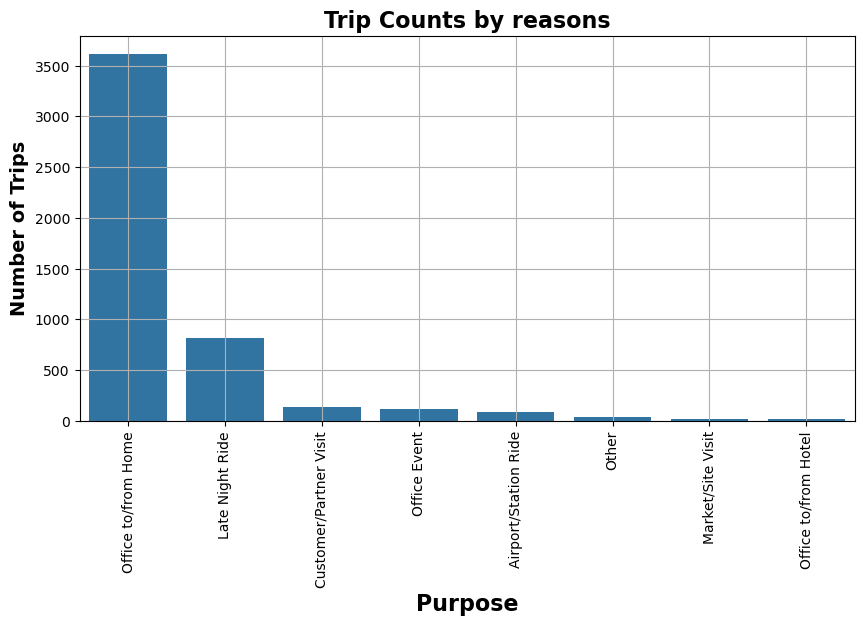

In [13]:
# Trip count by reasons
purpose_counts=df["reason"].value_counts()
#plotting
plt.figure(figsize=(10,5))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values)
plt.title('Trip Counts by reasons',color='Black',fontweight='bold',fontsize=16)
plt.xlabel('Purpose',color='Black',fontweight='bold',fontsize=16)
plt.ylabel('Number of Trips',color='Black',fontweight='bold',fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()


#### Throughout 2018 93% percent of the customer use OLA for business occassions,compared to only 7% who used it for personal use
#### If from the very first start the company targeting business people his result wouldn't be so much of a concern. 
#### However, if the company also indeed target Personal use customer, this result is concerning and thus needs to be investigated moree.

### Distribution of trip across time slot

In [14]:
df["hour"]=df["booking_date_time"].dt.hour

In [15]:
time_slots={
    0:"Late Night",
    1:"Midnight",
    2:"Midnight",
    3:"Early Morning",
    4:"Early Morning",
    5:"Early Morning",
    6:"Morning",
    7:"Morning",
    8:"Morning",
    9:"Morning",
    10:"Morning",
    11:"Morning",
    12:"After Noon",
    13:"After Noon",
    14:"After Noon",
    15:"After Noon",
    16:"Evening",
    17:"Evening",
    18:"Evening",
    19:"Night",
    20:"Night",
    21:"Night",
    22:"Late Night",
    23:"Late Night"
}
df["time_slot"]=df["hour"].apply(lambda x: time_slots.get(x))
    

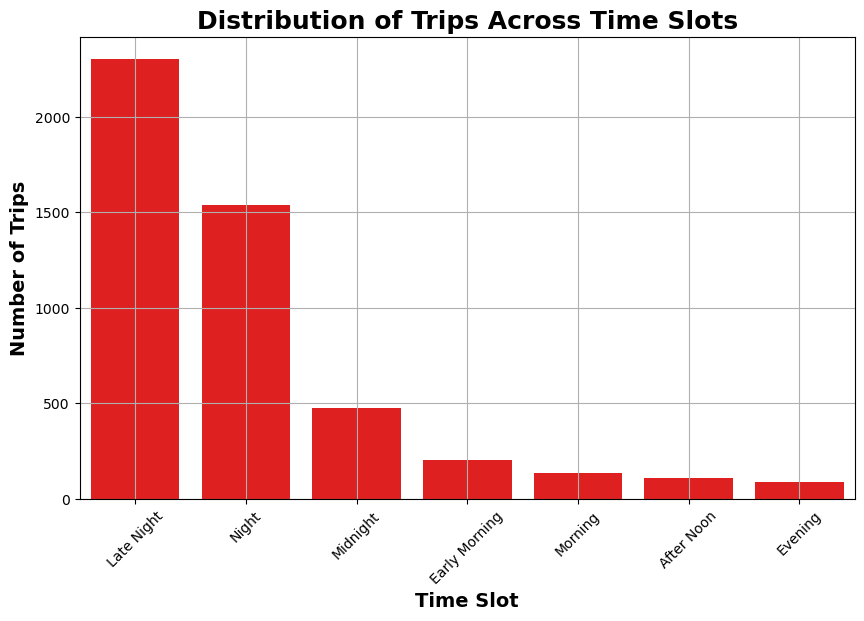

In [16]:
time_slot_counts = df['time_slot'].value_counts()

# Visualization: Distribution of Trips in Different Time Slots
plt.figure(figsize=(10, 6))
sns.barplot(x=time_slot_counts.index, y=time_slot_counts.values,color="red")
plt.title('Distribution of Trips Across Time Slots',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Time Slot',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Number of Trips',color='Black',fontweight='bold',fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Their is soo many reasons behind latenight bar at the top but according to me peoples prefer ola for the business purpose (for office and office events etc).
#### The second reason is  people prefer OLA in latenight because of safety reasons.peoples mainly ignore public transport in night and prefer personal OLA rides
#### Mainly the top3  time slots for the peoples to order OLA at latenight,night and midnight according to me all these 3 categories lies on (safety measures,business purposes like office etc).


### Average miles for reasons

In [18]:
average_miles_by_reasons=df.groupby("reason")["distance_travelled"].mean()
print(average_miles_by_reasons)

reason
Airport/Station Ride      15.393258
Customer/Partner Visit    15.197183
Late Night Ride            9.809002
Market/Site Visit         19.111111
Office Event              20.793103
Office to/from Home       11.538206
Office to/from Hotel      14.625000
Other                     13.523810
Name: distance_travelled, dtype: float64


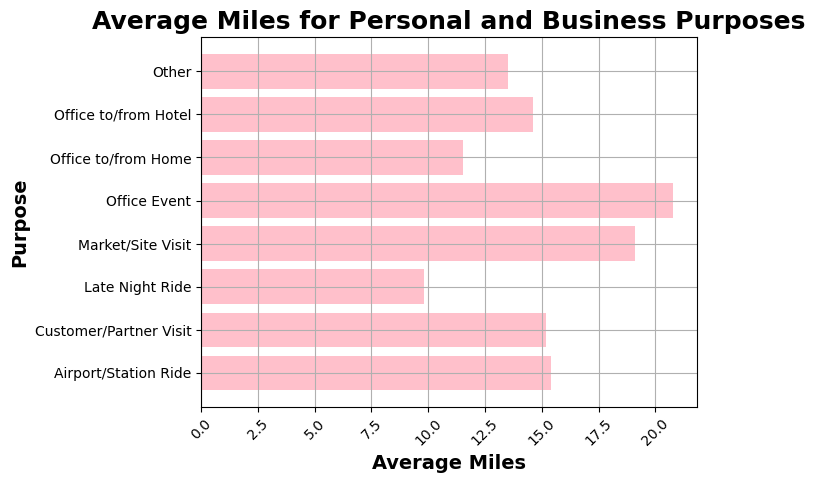

In [19]:
# Plotting the bar chart

plt.barh(average_miles_by_reasons.index, average_miles_by_reasons.values , color='pink')
plt.ylabel('Purpose',color='Black',fontweight='bold',fontsize=14)
plt.xlabel('Average Miles',color='Black',fontweight='bold',fontsize=14)
plt.title('Average Miles for Personal and Business Purposes',color='Black',fontweight='bold',fontsize=18)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Average miles per category

In [20]:
average_miles_per_category=df.groupby("category")["distance_travelled"].mean()
print(average_miles_per_category)

category
Lux                    6.000000
Micro                 12.467167
Mini                  11.140479
Mini Rentals          41.000000
Play                   6.000000
Prime                 10.088889
Prime Play            14.410256
Prime Play Rentals    27.916667
Prime Rentals         36.750000
SUV Rentals           27.000000
Sedan                  4.645161
Name: distance_travelled, dtype: float64


### plotting the pie chart

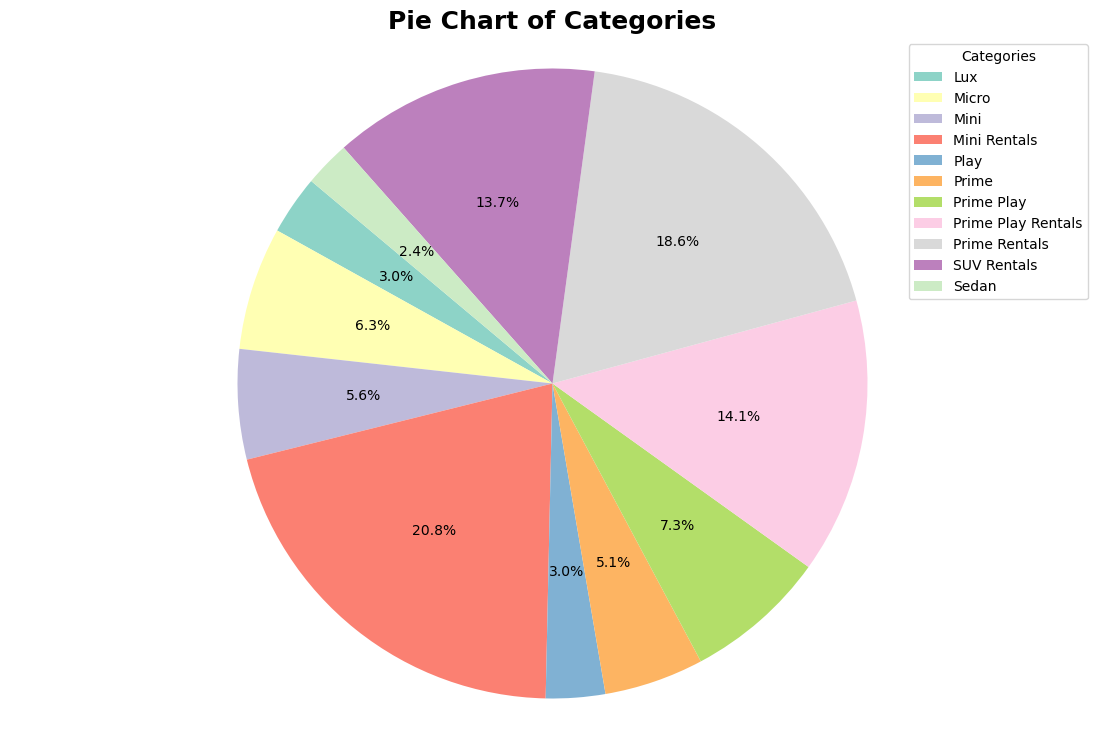

In [21]:
#Data for the pie chart
sizes=average_miles_per_category.values
labels=average_miles_per_category.index
colors = plt.cm.Set3.colors  # Choose a colormap
# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories',color='Black',fontweight='bold',fontsize=18)
plt.show()



#### In summary, this pie chart highlights that rental services are the most popular, followed by regular Prime and SUV rides, while other categories 

#### like Lux and Play have the least demand. The company could focus on enhancing rental options while also exploring ways to grow its premium offerings.

### count customers by weekdays

In [22]:
count_customer_by_weekdays=df["day_of_week"].value_counts()
print(count_customer_by_weekdays)

day_of_week
Thu    1022
Wed     987
Tue     975
Fri     801
Mon     746
Sat     255
Sun      71
Name: count, dtype: int64


### plotting the line chart

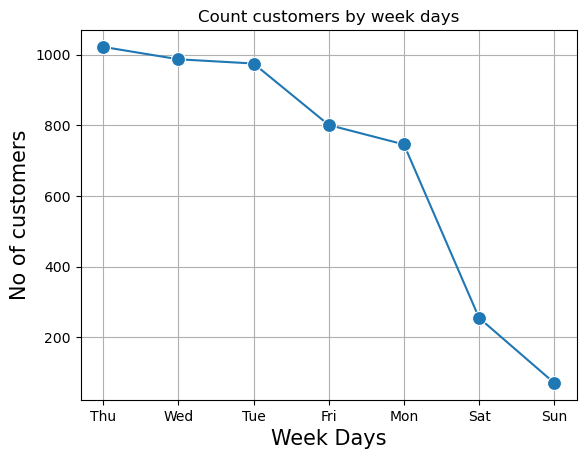

In [23]:
#data for the line chart
values=count_customer_by_weekdays.values
label=count_customer_by_weekdays.index
sns.lineplot(x=label,y=values,marker="o",markersize=10)
plt.title("Count customers by week days")
plt.xlabel("Week Days",color="black",size=15)
plt.ylabel("No of customers",color="black",size=15)
plt.grid()
plt.show()

#### Surprisingly, orders are less on sunday and  skyrocketing on thursday.
#### Low orders on the weekend can be associated with the customer segment proportion which implies ~93% of customers are ordering OLA for business purposes.

## How is the hourly trend for OLA trips?

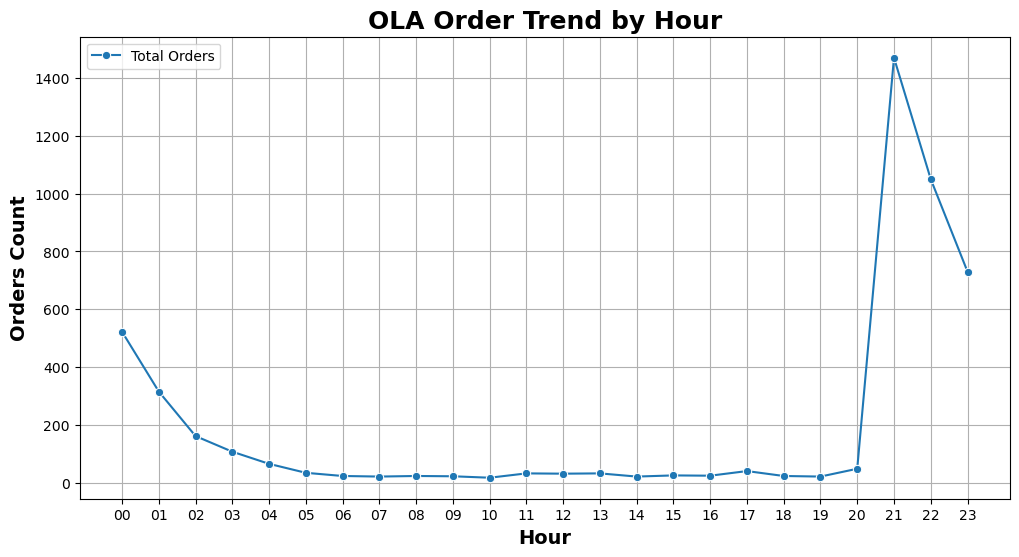

In [24]:
# copy dataset
hourly_data=df.copy()
# Create hour column
hourly_data['HOUR'] = hourly_data['booking_date_time'].apply(lambda x: x.strftime('%H'))
# Counting data in each column
hourly_data_count = hourly_data.groupby(['HOUR']).size().reset_index(name='COUNT')
# Plotting trend

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))
#Plotting
sns.lineplot(data=hourly_data_count,x="HOUR",y="COUNT",marker=".",markersize=12,label="Total Orders")
plt.title("OLA Order Trend by Hour",color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Hour',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Orders Count',color='Black',fontweight='bold',fontsize=14)
plt.grid()
plt.show()



#### So we predict earlier that manily ola rides is used for business purposes(home to office/office Events etc) so thats why we easily see in visualization that the skyrocket at 8 P.M because office persons come back to home and go to office for night shift  so that is one of the reason behind it 

#### Apparently their is minimum OLA rides at the time of 9 to 10 A.M may be peoples prefer public transport at the time of morning and prefer OLA rides at night may be  this is one another reason behind it.

### Histogram for OLA trip Durations

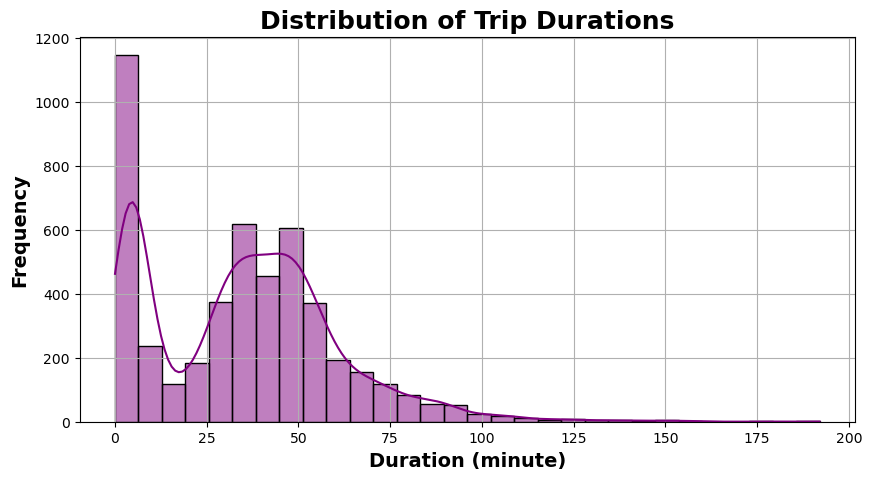

In [25]:
# Plot distribution of trip durations
plt.figure(figsize=(10, 5))
sns.histplot(df['time_taken'], bins=30,color='purple', kde=True)
plt.title('Distribution of Trip Durations',color='Black',fontweight='bold',fontsize=18)
plt.xlabel('Duration (minute)',color='Black',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',color='Black',fontweight='bold',fontsize=14)
plt.grid()
plt.show()

#### The highest bar is at the very beginning, indicating that most OLA rides have very short durations, likely under 10 minutes.
#### This suggests that many trips are quick, possibly within a small geographic area like short-distance within a city.
#### There appears to be a second peak around 40–50 minutes, which could suggest a second group of users or types of trips, such as people traveling across larger areas for example, airport transfers or intercity rides.
#### The frequency drops significantly after 100 minutes, indicating that extremely long trips are rare.










### Category and their average revenue from commission_base_cost

In [26]:
revenue_=df.groupby("category")["commission_base_cost"].mean()
print(revenue_)

category
Lux                   120.200000
Micro                  44.950324
Mini                   47.343512
Mini Rentals          235.200000
Play                   20.736364
Prime                  48.040874
Prime Play             73.309487
Prime Play Rentals    204.755000
Prime Rentals         229.365000
SUV Rentals           229.800000
Sedan                  14.021613
Name: commission_base_cost, dtype: float64


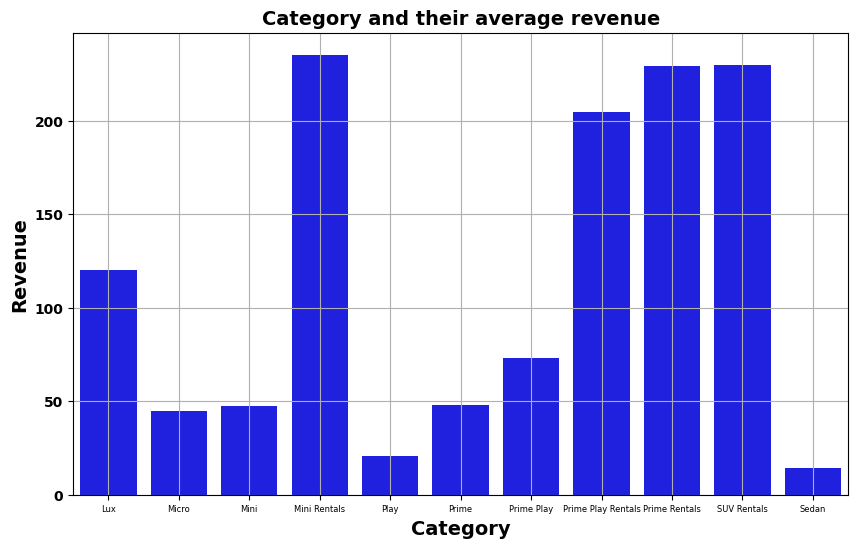

In [86]:
# plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=revenue_.index,y=revenue_.values,color="blue")
plt.title("Category and their average revenue",color="black",fontweight="bold",fontsize=14)
plt.xlabel("Category",color="black",fontweight="bold",fontsize=14)
plt.ylabel("Revenue",color="black",fontweight="bold",fontsize=14)
plt.xticks(fontsize=6)
plt.yticks(fontweight="bold")
plt.grid()
plt.show()


#### Mini Rentals, Prime Rentals, and SUV Rentals are the top revenue generators, with all of them generating over 200 units of revenue.

#### This indicates that rental services are a major source of revenue, likely due to their longer duration compared to regular point-to-point rides.





# Thankyou!